<a href="https://colab.research.google.com/github/UzunDemir/Neural_networks_and_NLP/blob/main/7practic_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.4 Практическая работа

## Цель практической работы
### Научиться применять предобученные эмбеддинги для решения NLP-задач с помощью BERT и GPT-2.



### Что нужно сделать
Вы научитесь предсказывать наличие спама в сообщениях из электронной почты на основе содержащегося в них текста. Используя один из способов получения векторов, достигните минимального значения метрики F1-score — 0,8.

### Выполните задание с использованием PyTorch.

Датасет: [Emails for spam or ham classification (Trec 2006).](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fbayes2003%2Femails-for-spam-or-ham-classification-trec-2006)

Файл: email_text.csv.

1. Установите !pip install sentence_transformers.
2. Загрузите файл email_text.csv из датасета Emails for spam or ham classification (Trec 2006), используйте для работы первую тысячу строк.
3. Проверьте на наличие null-значений и удалите их, если они есть.
4. Проведите предобработку текста: преобразуйте текст в нижний регистр; преобразуйте сокращения; удалите лишние пробелы, знаки препинания, стоп-слова; лемматизируйте слова.
5. Загрузите предобученную модель.
6. Разделите полученные данные на тестовую и обучающую выборки в соотношении 80 на 20.
7. Преобразуйте X_train, X_test, y_train, y_test в тензоры PyTorch.
8. Создайте DataLoader для обучающего и тестового наборов данных, используя TensorDataset и DataLoader.
9. Постройте архитектуру простой нейронной сети для решения задачи бинарной классификации.
10. Оцените работу модели, построив графики Accuracy и Loss.
11. Рассчитайте для тестовой выборки метрики Accuracy, F1-score.
12. Сравните методы получения эмбеддингов. Какой результат лучше и почему?

In [1]:
!pip install sentence_transformers

In [2]:
!pip install kaggle

In [3]:
!kaggle datasets download -d bayes2003/emails-for-spam-or-ham-classification-trec-2006

Dataset URL: https://www.kaggle.com/datasets/bayes2003/emails-for-spam-or-ham-classification-trec-2006
License(s): ODbL-1.0
emails-for-spam-or-ham-classification-trec-2006.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
import os

# Путь к вашему архиву fake-news.zip
zip_file = '/content/emails-for-spam-or-ham-classification-trec-2006.zip'

# Папка, куда вы хотите распаковать файлы
extract_dir = '/content/'

# Распаковка архива
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Вывод содержимого распакованной папки
os.listdir(extract_dir)


['.config',
 'email_text.csv',
 'email_origin.csv',
 'emails-for-spam-or-ham-classification-trec-2006.zip',
 'trec06p.tgz',
 'sample_data']

In [5]:
import pandas as pd

In [6]:
full_data_path = "/content/email_origin.csv"
# Загрузка данных, исключая столбец 'id'
full_data = pd.read_csv(full_data_path, usecols=lambda column: column != 'id')

In [7]:
full_data.shape

(37822, 2)

In [8]:
full_data

,label,origin
0,0,Received: from rodan.UU.NET by aramis.rutgers....
1,1,Received: from unknown (HELO groucho.cs.psu.ed...
2,1,Received: \n\tfrom 24-151-178-89.dhcp.kgpt.tn....
3,0,Received: from psuvax1.cs.psu.edu ([130.203.2....
4,1,Received: from 201-1-198-159.dsl.telesp.net.br...
...,...,...
37817,1,Received: from ?211.200.1.51? (unknown [211.20...
37818,1,Received: \n\tfrom dsl.dynamic212156187251.ttn...
37819,1,Received: from wonder.hananet.net (unknown [21...
37820,1,Received: from mail.csonline.com (unknown [61....


In [9]:
full_data_path = "/content/email_text.csv"
# Загрузка данных, исключая столбец 'id'
df = pd.read_csv(full_data_path, usecols=lambda column: column != 'id', nrows=1000)

In [10]:
df

,label,text
0,0,the mailing list i queried about a few weeks a...
1,1,luxury watches buy your own rolex for only esc...
2,1,academic qualifications available from prestig...
3,0,greetings all this is to verify your subscript...
4,1,try chauncey may conferred the luscious not co...
...,...,...
995,1,b b b wfescapenumber kescapenumbern i l kh es...
996,1,escapelong g escapenumber n c w r rescapenumb...
997,1,b d j escapenumber j n c k b escapenumber i e...
998,1,hi escapenumber a v p c l v x m a r i e i a b ...


In [11]:
print(df.isnull().sum())


label    0
text     0
dtype: int64


In [12]:
# Преобразование текста в нижний регистр
df['text'] = df['text'].str.lower()

In [13]:
df

,label,text
0,0,the mailing list i queried about a few weeks a...
1,1,luxury watches buy your own rolex for only esc...
2,1,academic qualifications available from prestig...
3,0,greetings all this is to verify your subscript...
4,1,try chauncey may conferred the luscious not co...
...,...,...
995,1,b b b wfescapenumber kescapenumbern i l kh es...
996,1,escapelong g escapenumber n c w r rescapenumb...
997,1,b d j escapenumber j n c k b escapenumber i e...
998,1,hi escapenumber a v p c l v x m a r i e i a b ...


In [14]:
abbreviations = {
    "a.k.a.": "also known as",
    "avg": "average",
    "b.c.": "before Christ",
    "b.d.": "business day",
    "c.o.d.": "cash on delivery",
    "e.g.": "for example",
    "e.g.": "exempli gratia",
    "et al.": "et alii",
    "etc.": "et cetera",
    "fyi": "for your information",
    "i.e.": "that is",
    "inc.": "incorporated",
    "info": "information",
    "m.a.": "Master of Arts",
    "mph": "miles per hour",
    "n.b.": "nota bene",
    "no.": "number",
    "p.m.": "post meridiem",
    "r.d.": "registered dietitian",
    "r.s.v.p.": "répondez s'il vous plaît",
    "s.o.s.": "save our souls",
    "u.s.": "United States",
    "vs.": "versus",
    "w/o": "without",
    "w.r.t.": "with respect to",
    "y.o.y.": "year over year",
    "a.m.": "ante meridiem",
    "b.a.": "Bachelor of Arts",
    "b.s.": "Bachelor of Science",
    "c.c.": "cubic centimeter",
    "c.v.": "curriculum vitae",
    "d.i.y.": "do it yourself",
    "d.b.a.": "doing business as",
    "dr.": "doctor",
    "edu.": "education",
    "ex.": "example",
    "h.c.": "honoris causa",
    "j.k.": "just kidding",
    "k.o.": "knockout",
    "ltd.": "limited",
    "m.d.": "Doctor of Medicine",
    "n/a": "not applicable",
    "ph.d.": "Doctor of Philosophy",
    "p.s.": "postscript",
    "q.c.": "quality control",
    "q.e.d.": "quod erat demonstrandum",
    "r&d": "research and development",
    "s.i.": "système international",
    "t.b.d.": "to be determined",
    "t.b.a.": "to be announced",
    "u.k.": "United Kingdom",
    "u.n.": "United Nations",
    "v.i.p.": "very important person",
    "w.r.t.": "with respect to",
    "w.s.": "World Series",
    "y.m.c.a.": "Young Men's Christian Association"
}


In [15]:
import pandas as pd
import re
from collections import Counter

def expand_abbreviations_and_count(text, abbrev_dict):
    # Создание шаблона для поиска сокращений
    pattern = re.compile('|'.join(re.escape(key) for key in abbrev_dict.keys()))

    # Функция для замены сокращений и подсчета замен
    def replace_and_count(match):
        abbrev = match.group(0)
        expanded = abbrev_dict[abbrev]
        replacements[abbrev] += 1  # Подсчет замен
        return expanded

    replacements = Counter()  # Словарь для подсчета замен
    expanded_text = pattern.sub(replace_and_count, text)

    return expanded_text, replacements


In [16]:
# Применение функции к DataFrame
df['expanded_text'], df['replacements'] = zip(*df['text'].apply(lambda text: expand_abbreviations_and_count(text, abbreviations)))

# Вывод результатов
print("DataFrame с заменами:")
print(df[['expanded_text']])
print("\nПодсчет замен:")
print(df['replacements'].sum())

DataFrame с заменами:
                                         expanded_text
0    the mailing list i queried about a few weeks a...
1    luxury watches buy your own rolex for only esc...
2    academic qualifications available from prestig...
3    greetings all this is to verify your subscript...
4    try chauncey may conferred the luscious not co...
..                                                 ...
995   b b b wfescapenumber kescapenumbern i l kh es...
996   escapelong g escapenumber n c w r rescapenumb...
997   b d j escapenumber j n c k b escapenumber i e...
998  hi escapenumber a v p c l v x m a r i e i a b ...
999  hi escapenumber v p c x l a v a r i a e m i l ...

[1000 rows x 1 columns]

Подсчет замен:
Counter({'info': 984, 'fyi': 73, 'mph': 71, 'avg': 3})


In [17]:
# Удаление лишних пробелов: начальных, конечных и множественных пробелов
df['expanded_text'] = df['expanded_text'].apply(lambda text: re.sub(r'\s+', ' ', text.strip()))

In [18]:
import string
# Удаление знаков препинания
df['expanded_text'] = df['expanded_text'].str.replace(f"[{string.punctuation}]", "", regex=True)

In [19]:
stop_words = set([
    "a", "an", "the", "and", "or", "but", "if", "then", "so", "because",
    "as", "of", "to", "in", "with", "on", "at", "by", "for", "from",
    "this", "that", "these", "those", "which", "who", "whom", "whose",
    "it", "its", "they", "their", "them", "us", "our", "mine", "yours",
    "hers", "his", "its", "ours", "yours", "theirs"
])


In [20]:
def remove_stop_words(text, stop_words):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    removed_words_count = len(words) - len(filtered_words)
    return " ".join(filtered_words), removed_words_count

In [21]:
# Применение функции к DataFrame и подсчет удаленных стоп-слов
df['filtered_text'], df['stop_words_removed'] = zip(*df['expanded_text'].apply(lambda text: remove_stop_words(text, stop_words)))

# Суммарное количество удаленных стоп-слов
total_stop_words_removed = df['stop_words_removed'].sum()

print("DataFrame с удаленными стоп-словами:")
print(df[['filtered_text']])
print("\nОбщее количество удаленных стоп-слов:")
print(total_stop_words_removed)

DataFrame с удаленными стоп-словами:
                                         filtered_text
0    mailing list i queried about few weeks ago is ...
1    luxury watches buy your own rolex only escapen...
2    academic qualifications available prestigious ...
3    greetings all is verify your subscription plan...
4    try chauncey may conferred luscious not contin...
..                                                 ...
995  b b b wfescapenumber kescapenumbern i l kh esc...
996  escapelong g escapenumber n c w r rescapenumbe...
997  b d j escapenumber j n c k b escapenumber i es...
998  hi escapenumber v p c l v x m r i e i b l o v ...
999  hi escapenumber v p c x l v r i e m i l o n v ...

[1000 rows x 1 columns]

Общее количество удаленных стоп-слов:
130374


In [22]:
df

,label,text,expanded_text,replacements,filtered_text,stop_words_removed
0,0,the mailing list i queried about a few weeks a...,the mailing list i queried about a few weeks a...,{},mailing list i queried about few weeks ago is ...,140
1,1,luxury watches buy your own rolex for only esc...,luxury watches buy your own rolex for only esc...,{},luxury watches buy your own rolex only escapen...,8
2,1,academic qualifications available from prestig...,academic qualifications available from prestig...,{},academic qualifications available prestigious ...,21
3,0,greetings all this is to verify your subscript...,greetings all this is to verify your subscript...,{},greetings all is verify your subscription plan...,16
4,1,try chauncey may conferred the luscious not co...,try chauncey may conferred the luscious not co...,{},try chauncey may conferred luscious not contin...,2
...,...,...,...,...,...,...
995,1,b b b wfescapenumber kescapenumbern i l kh es...,b b b wfescapenumber kescapenumbern i l kh esc...,{},b b b wfescapenumber kescapenumbern i l kh esc...,10
996,1,escapelong g escapenumber n c w r rescapenumb...,escapelong g escapenumber n c w r rescapenumbe...,{},escapelong g escapenumber n c w r rescapenumbe...,4
997,1,b d j escapenumber j n c k b escapenumber i e...,b d j escapenumber j n c k b escapenumber i es...,{},b d j escapenumber j n c k b escapenumber i es...,2
998,1,hi escapenumber a v p c l v x m a r i e i a b ...,hi escapenumber a v p c l v x m a r i e i a b ...,{},hi escapenumber v p c l v x m r i e i b l o v ...,32


In [23]:
! pip install spacy


In [24]:
!python -m spacy download en_core_web_sm


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [25]:
import spacy

# Загрузка английской модели
nlp = spacy.load('en_core_web_sm')


In [26]:
def lemmatize_text(text, nlp):
    doc = nlp(text)
    lemmatized_text = " ".join(token.lemma_ for token in doc if not token.is_punct and not token.is_stop)
    return lemmatized_text


In [27]:
# Применение функции лемматизации к DataFrame
df['lemmatized_text'] = df['filtered_text'].apply(lambda text: lemmatize_text(text, nlp))

print("DataFrame с лемматизированным текстом:")
df[['lemmatized_text']]


DataFrame с лемматизированным текстом:


,lemmatized_text
0,mailing list query week ago run set archive se...
1,luxury watch buy rolex escapenumber rolex cart...
2,academic qualification available prestigious n...
3,greeting verify subscription planescapenumber ...
4,try chauncey conferred luscious continue tonsi...
...,...
995,b b b wfescapenumber kescapenumbern l kh escap...
996,escapelong g escapenumber n c w r rescapenumbe...
997,b d j escapenumber j n c k b escapenumber esca...
998,hi escapenumber v p c l v x m r e b l o v n z ...


In [28]:
!pip install transformers


In [29]:
df['lemmatized_text']

0      mailing list query week ago run set archive se...
1      luxury watch buy rolex escapenumber rolex cart...
2      academic qualification available prestigious n...
3      greeting verify subscription planescapenumber ...
4      try chauncey conferred luscious continue tonsi...
                             ...                        
995    b b b wfescapenumber kescapenumbern l kh escap...
996    escapelong g escapenumber n c w r rescapenumbe...
997    b d j escapenumber j n c k b escapenumber esca...
998    hi escapenumber v p c l v x m r e b l o v n z ...
999    hi escapenumber v p c x l v r e m l o n v b z ...
Name: lemmatized_text, Length: 1000, dtype: object

## BERT
Для загрузки предобученной модели используем библиотеку transformers от Hugging Face

### 1. Загрузка предобученной модели

In [30]:
from transformers import BertTokenizer, BertModel

# Загрузка предобученной модели и токенизатора
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

### 2. Разделение данных на тестовую и обучающую выборки

In [31]:
from sklearn.model_selection import train_test_split

# Подготовка данных
X = df['lemmatized_text'].tolist()
y = df['label'].tolist()

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 3. Преобразование в тензоры PyTorch

In [33]:
import torch

# Токенизация и преобразование в тензоры
def tokenize_and_convert(texts, tokenizer, max_length=128):
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length, return_tensors='pt')
    return encodings['input_ids'], encodings['attention_mask']

X_train_ids, X_train_mask = tokenize_and_convert(X_train, tokenizer)
X_test_ids, X_test_mask = tokenize_and_convert(X_test, tokenizer)

# Преобразование меток в тензоры
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)



### 4. Создание DataLoader

In [34]:
from torch.utils.data import TensorDataset, DataLoader

# Создание TensorDataset
train_dataset = TensorDataset(X_train_ids, X_train_mask, y_train)
test_dataset = TensorDataset(X_test_ids, X_test_mask, y_test)

# Создание DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


### 5. Построение архитектуры нейронной сети

In [35]:
import torch.nn as nn
import torch.optim as optim

class SpamClassifier(nn.Module):
    def __init__(self, hidden_size=768):
        super(SpamClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(model_name)
        self.fc = nn.Linear(hidden_size, 2)  # Два класса: спам и не спам

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        logits = self.fc(pooled_output)
        return logits

# Создание модели
model = SpamClassifier()


### 6. Оценка работы модели

Epoch 1/3
Train Loss: 0.5172
Validation Loss: 0.2292
Epoch 2/3
Train Loss: 0.1743
Validation Loss: 0.0815
Epoch 3/3
Train Loss: 0.0611
Validation Loss: 0.0471


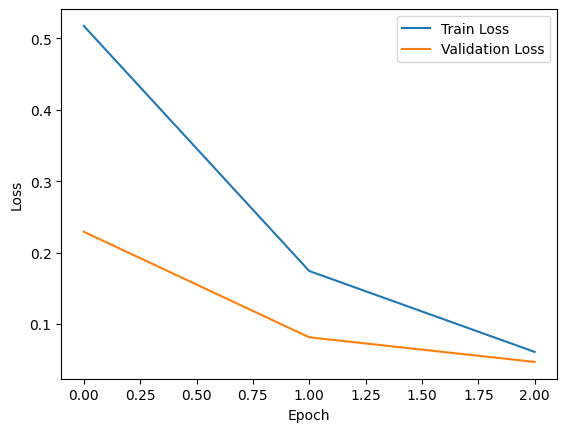

In [36]:
import matplotlib.pyplot as plt

# Функции потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)

def train_epoch(model, data_loader, optimizer, criterion):
    model.train()
    total_loss = 0
    for batch in data_loader:
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

def evaluate(model, data_loader):
    model.eval()
    total_loss = 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in data_loader:
            input_ids, attention_mask, labels = batch
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.tolist())
            all_labels.extend(labels.tolist())
    return total_loss / len(data_loader), all_preds, all_labels

# Обучение и оценка
num_epochs = 3
train_losses, val_losses = [], []
for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, optimizer, criterion)
    val_loss, val_preds, val_labels = evaluate(model, test_loader)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}')
    print(f'Train Loss: {train_loss:.4f}')
    print(f'Validation Loss: {val_loss:.4f}')

# Построение графиков
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### 7. Расчет метрик Accuracy и F1-score

In [37]:
from sklearn.metrics import accuracy_score, f1_score

# Вычисление метрик
accuracy = accuracy_score(val_labels, val_preds)
f1 = f1_score(val_labels, val_preds)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9900
F1 Score: 0.9839


## Обучение модели на основе TF-IDF эмбеддингов

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score

# TF-IDF векторизация
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Модель для TF-IDF эмбеддингов
tfidf_model = MultinomialNB()
tfidf_model.fit(X_train_tfidf, y_train)

# Прогнозирование и оценка
y_pred_tfidf = tfidf_model.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf)

print(f'TF-IDF Accuracy: {accuracy_tfidf:.4f}')
print(f'TF-IDF F1 Score: {f1_tfidf:.4f}')


TF-IDF Accuracy: 0.9150
TF-IDF F1 Score: 0.8411


In [40]:
# Сравнение результатов
print(f'BERT Accuracy: {accuracy_bert:.4f}')
print(f'BERT F1 Score: {f1_bert:.4f}')
print(f'TF-IDF Accuracy: {accuracy_tfidf:.4f}')
print(f'TF-IDF F1 Score: {f1_tfidf:.4f}')

# Выбор наиболее подходящего метода
if accuracy_bert > accuracy_tfidf and f1_bert > f1_tfidf:
    print("BERT дает лучшие результаты.")
else:
    print("TF-IDF дает лучшие результаты.")


BERT Accuracy: 0.9900
BERT F1 Score: 0.9839
TF-IDF Accuracy: 0.9150
TF-IDF F1 Score: 0.8411
BERT дает лучшие результаты.


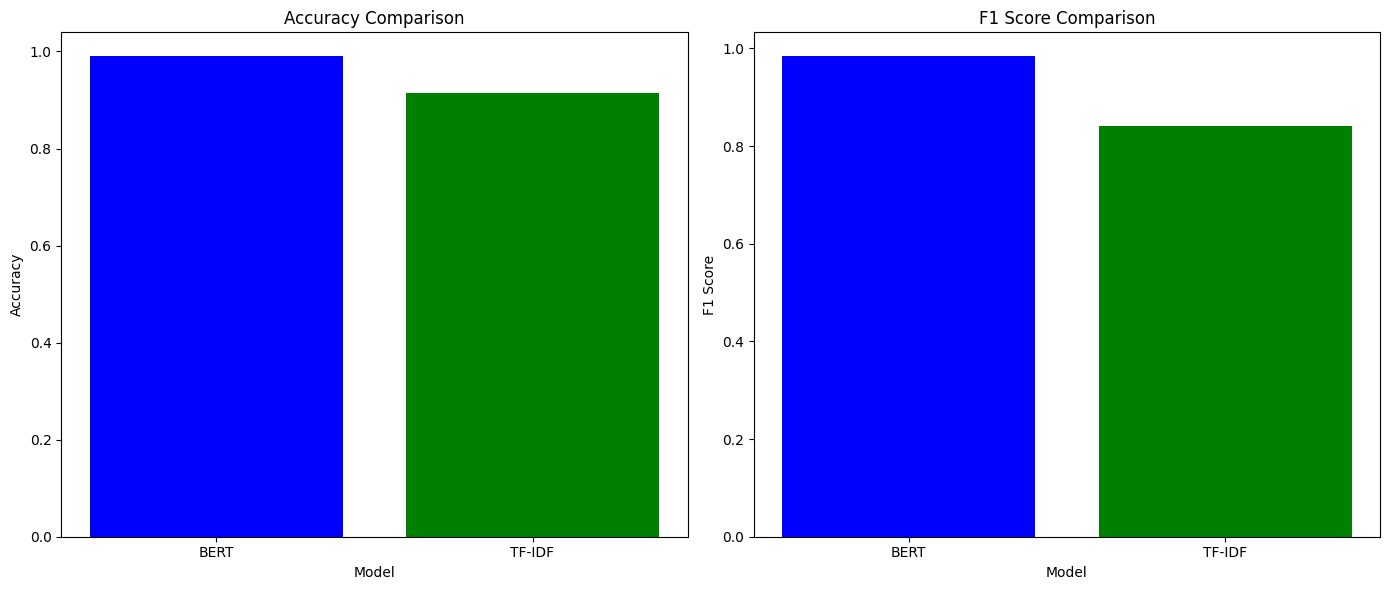

In [41]:
import matplotlib.pyplot as plt

# Метрики для BERT
accuracy_bert = accuracy_score(val_labels, val_preds)
f1_bert = f1_score(val_labels, val_preds)

# Метрики для TF-IDF
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf)

# Подготовка данных для графиков
metrics = {
    'Accuracy': [accuracy_bert, accuracy_tfidf],
    'F1 Score': [f1_bert, f1_tfidf]
}
models = ['BERT', 'TF-IDF']

# Построение графиков
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# График Accuracy
ax[0].bar(models, metrics['Accuracy'], color=['blue', 'green'])
ax[0].set_title('Accuracy Comparison')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Accuracy')

# График F1 Score
ax[1].bar(models, metrics['F1 Score'], color=['blue', 'green'])
ax[1].set_title('F1 Score Comparison')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('F1 Score')

# Показ графиков
plt.tight_layout()
plt.show()


## Выводы:

* BERT Accuracy: 0.9900
BERT F1 Score: 0.9839

* TF-IDF Accuracy: 0.9150
TF-IDF F1 Score: 0.8411
### BERT дает лучшие результаты.